### Import Packages

In [2]:
from matplotlib import pyplot as plt
import numpy as np
import os.path as osp
import pickle
import scipy.misc
from image_generator import *
from utils import *
from sift_utils import *
from hog_utils import *

#### Load training dataset

In [3]:
from image_generator import load_train_images
train_images_waldo = load_train_images('training_set/waldo_body')
train_images_wenda = load_train_images('training_set/wenda_body')
train_images_wizard = load_train_images('training_set/wizard_body')
train_images_others = load_train_images('training_set/others_body', True)

In [4]:
training_set = []
training_set.extend(train_images_waldo)
training_set.extend(train_images_wenda)
training_set.extend(train_images_wizard)
training_set.extend(train_images_others)

In [5]:
train_labels = ['waldo'] * len(train_images_waldo)
train_labels.extend(['wenda'] * len(train_images_wenda))
train_labels.extend(['wizard'] * len(train_images_wizard))
train_labels.extend(['others'] * len(train_images_others))

In [6]:
val_images_waldo = load_train_images('validation_set/waldo_body')
val_images_wenda = load_train_images('validation_set/wenda_body')
val_images_wizard = load_train_images('validation_set/wizard_body')
val_images_others = load_train_images('validation_set/others_body', True)

In [7]:
val_images_all = []
val_images_all.extend(val_images_waldo)
val_images_all.extend(val_images_wenda)
val_images_all.extend(val_images_wizard)
val_images_all.extend(val_images_others)

In [8]:
val_labels = ['waldo'] * len(val_images_waldo)
val_labels.extend(['wenda'] * len(val_images_wenda))
val_labels.extend(['wizard'] * len(val_images_wizard))
val_labels.extend(['others'] * len(val_images_others))

# SVM

## Waldo

In [9]:
val_labels_waldo = ['waldo'] * len(val_images_waldo)
val_labels_waldo.extend(['others'] * len(val_images_wenda))
val_labels_waldo.extend(['others'] * len(val_images_wizard))
val_labels_waldo.extend(['others'] * len(val_images_others))

train_labels_waldo = ['waldo'] * len(train_images_waldo)
train_labels_waldo.extend(['others'] * len(train_images_waldo))

training_set_waldo = []
training_set_waldo.extend(train_images_waldo)
training_set_others_waldo = []
training_set_others_waldo.extend(train_images_wenda)
training_set_others_waldo.extend(train_images_wizard)
training_set_others_waldo.extend(train_images_others)
training_set_waldo.extend(np.random.choice(training_set_others_waldo, len(train_images_waldo)))


In [10]:
dim = 128  # length of the SIFT descriptors that you are going to compute.
vocab = np.zeros((200, dim))
total_SIFT_features = np.zeros((20 * len(training_set_waldo), dim))

3.864980936050415
Average Accuracy: 71.67%
12.41727876663208
Average Accuracy: 80.00%
11.477705955505371
Average Accuracy: 80.00%


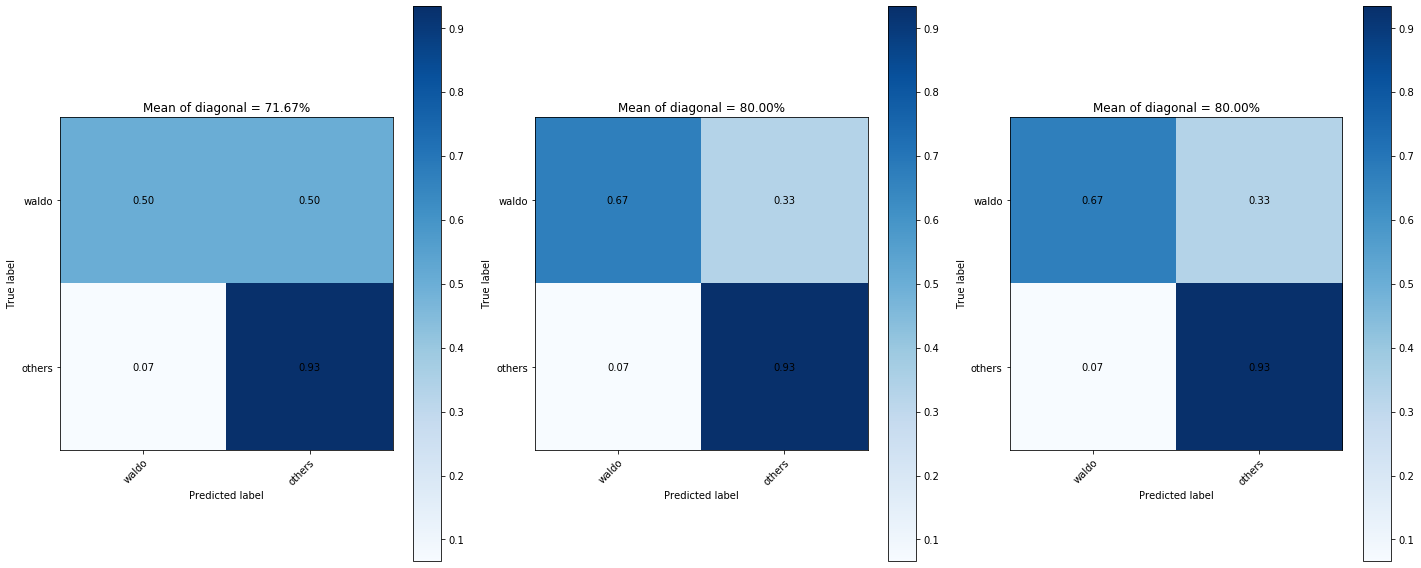

In [11]:
categories_waldo = ["waldo", "others"]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svm_waldo1 = show_svm_res('vocab_waldo_body', val_images_all, 200, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax1)
svm_waldo2 = show_svm_res('vocab_waldo_body', val_images_all, 500, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax2)
svm_waldo3 = show_svm_res('vocab_waldo_body', val_images_all, 1000, training_set_waldo, train_labels_waldo, val_labels_waldo, categories_waldo, ax3)
fig.tight_layout()

[INFO] training classifier...
[INFO] evaluating...
Average Accuracy: 95.00%


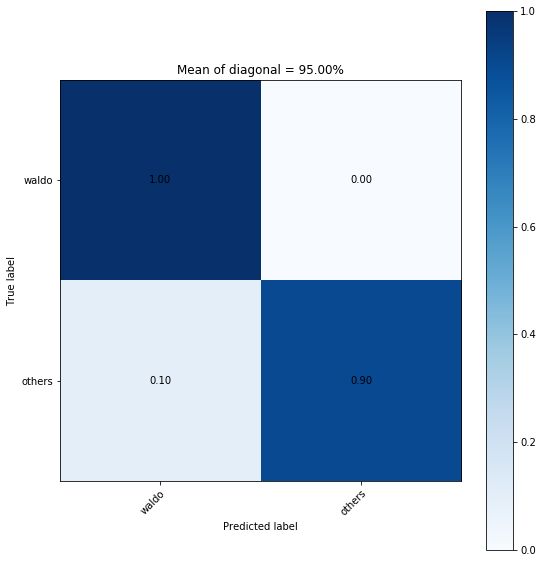

In [13]:
hog_waldo = train_hog(training_set_waldo, train_labels_waldo)
fig, (ax) = plt.subplots(1, 1, figsize=(8,8))
val_labels_hog2 = ['waldo'] * len(val_images_waldo)
val_labels_hog2.extend(['others'] * (len(val_images_others)+ len(val_images_wenda) + len(val_images_wizard)))
show_hog_res(val_images_all, val_labels_hog2, hog_waldo, ax, categories=["waldo", "others"])
fig.tight_layout()

In [14]:
save(hog_waldo, "hog_waldo_body")

hog_waldo_body saved


### Wenda

In [15]:
val_labels_wenda = ['others'] * len(val_images_waldo)
val_labels_wenda.extend(['wenda'] * len(val_images_wenda))
val_labels_wenda.extend(['others'] * len(val_images_wizard))
val_labels_wenda.extend(['others'] * len(val_images_others))

train_labels_wenda = ['wenda'] * len(train_images_wenda)
train_labels_wenda.extend(['others'] * len(train_images_wenda))

training_set_wenda = []
training_set_wenda.extend(train_images_wenda)
training_set_others_wenda = []
training_set_others_wenda.extend(train_images_waldo)
training_set_others_wenda.extend(train_images_wizard)
training_set_others_wenda.extend(train_images_others)
training_set_wenda.extend(np.random.choice(training_set_others_wenda, len(train_images_wenda)))

No existing visual word vocabulary found. Computing one from training images
vocab/vocab_wenda_body_200.pkl saved
7.682173013687134
Average Accuracy: 80.50%
No existing visual word vocabulary found. Computing one from training images
vocab/vocab_wenda_body_500.pkl saved
8.200155973434448
Average Accuracy: 81.06%
No existing visual word vocabulary found. Computing one from training images
vocab/vocab_wenda_body_1000.pkl saved
12.15876293182373
Average Accuracy: 72.79%


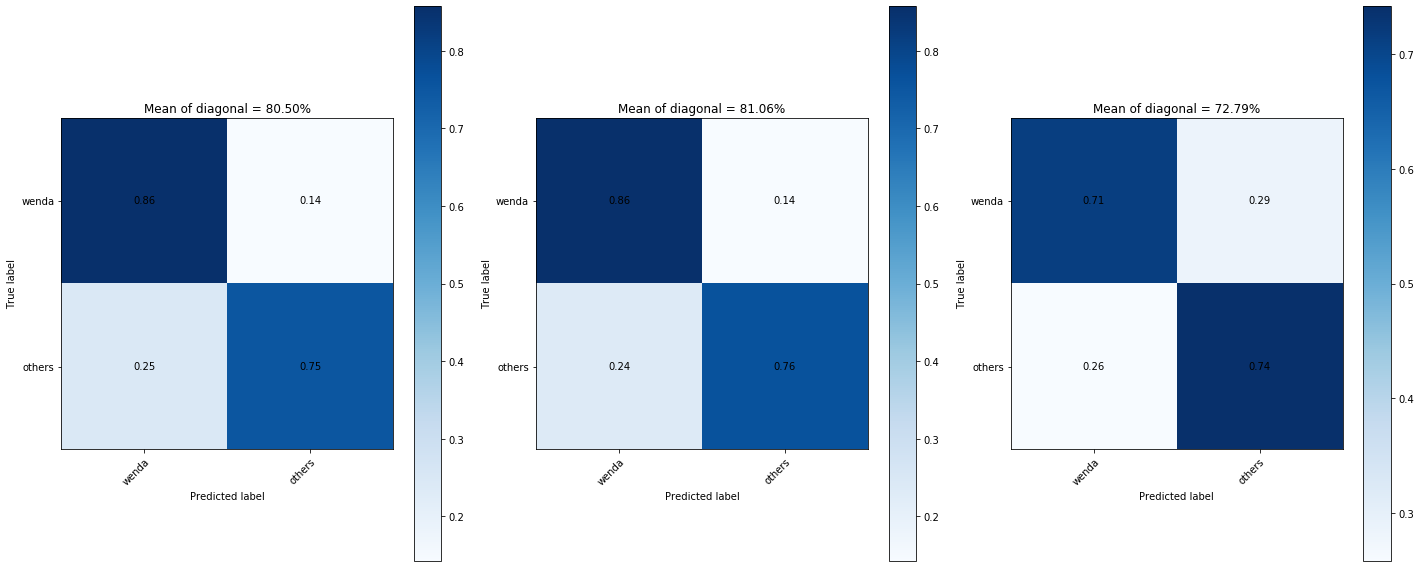

In [16]:
categories_wenda = ["wenda", "others"]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svm_wenda1 = show_svm_res('vocab_wenda_body', val_images_all, 200, training_set_wenda, train_labels_wenda, val_labels_wenda, categories_wenda, ax1)
svm_wenda2 = show_svm_res('vocab_wenda_body', val_images_all, 500, training_set_wenda, train_labels_wenda, val_labels_wenda, categories_wenda, ax2)
svm_wenda3 = show_svm_res('vocab_wenda_body', val_images_all, 1000, training_set_wenda, train_labels_wenda, val_labels_wenda, categories_wenda, ax3)
fig.tight_layout()

[INFO] training classifier...
[INFO] evaluating...
Average Accuracy: 89.89%


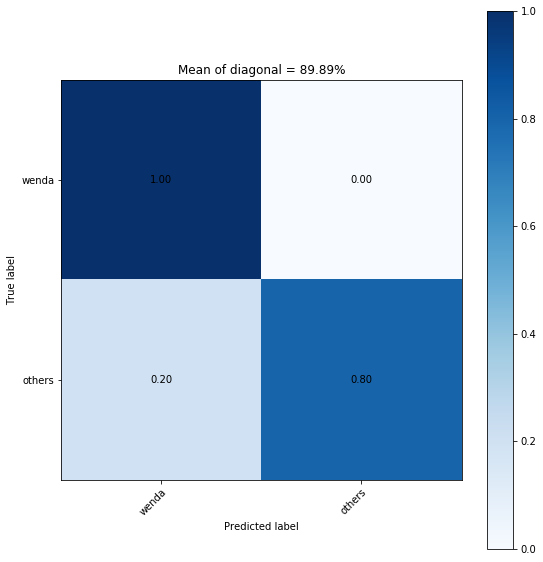

In [18]:
hog_wenda = train_hog(training_set_wenda, train_labels_wenda)
fig, (ax) = plt.subplots(1, 1, figsize=(8,8))
val_labels_hog_wenda = ['others'] * len(val_images_waldo)
val_labels_hog_wenda.extend(['wenda'] * len(val_images_wenda))
val_labels_hog_wenda.extend(['others'] * (len(val_images_others) + len(val_images_wizard)))
show_hog_res(val_images_all, val_labels_hog_wenda, hog_wenda, ax, categories=["wenda", "others"])
fig.tight_layout()

In [19]:
save(hog_wenda, "hog_wenda_body")

hog_wenda_body saved


### Wizard

In [20]:
val_labels_wizard = ['others'] * len(val_images_waldo)
val_labels_wizard.extend(['others'] * len(val_images_wenda))
val_labels_wizard.extend(['wizard'] * len(val_images_wizard))
val_labels_wizard.extend(['others'] * len(val_images_others))

train_labels_wizard = ['wizard'] * len(train_images_wizard)
train_labels_wizard.extend(['others'] * len(train_images_wizard))

training_set_wizard = []
training_set_wizard.extend(train_images_wizard)
training_set_others_wizard = []
training_set_others_wizard.extend(train_images_waldo)
training_set_others_wizard.extend(train_images_wenda)
training_set_others_wizard.extend(train_images_others)
training_set_wizard.extend(np.random.choice(training_set_others_wizard, len(train_images_wizard)))

In [ ]:
categories_wizard = ["wizard", "others"]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svm_wizard1 = show_svm_res('vocab_wizard_body', val_images_all, 200, training_set_wizard, train_labels_wizard, val_labels_wizard, categories_wizard, ax1)
svm_wizard2 = show_svm_res('vocab_wizard_body', val_images_all, 500, training_set_wizard, train_labels_wizard, val_labels_wizard, categories_wizard, ax2)
svm_wizard3 = show_svm_res('vocab_wizard_body', val_images_all, 1000, training_set_wizard, train_labels_wizard, val_labels_wizard, categories_wizard, ax3)
fig.tight_layout()

No existing visual word vocabulary found. Computing one from training images
vocab/vocab_wizard_600_200.pkl saved
22.73347496986389
Average Accuracy: 78.35%
No existing visual word vocabulary found. Computing one from training images
vocab/vocab_wizard_600_500.pkl saved
39.17876887321472
Average Accuracy: 61.97%
No existing visual word vocabulary found. Computing one from training images
vocab/vocab_wizard_600_1000.pkl saved
76.90537905693054
Average Accuracy: 64.14%


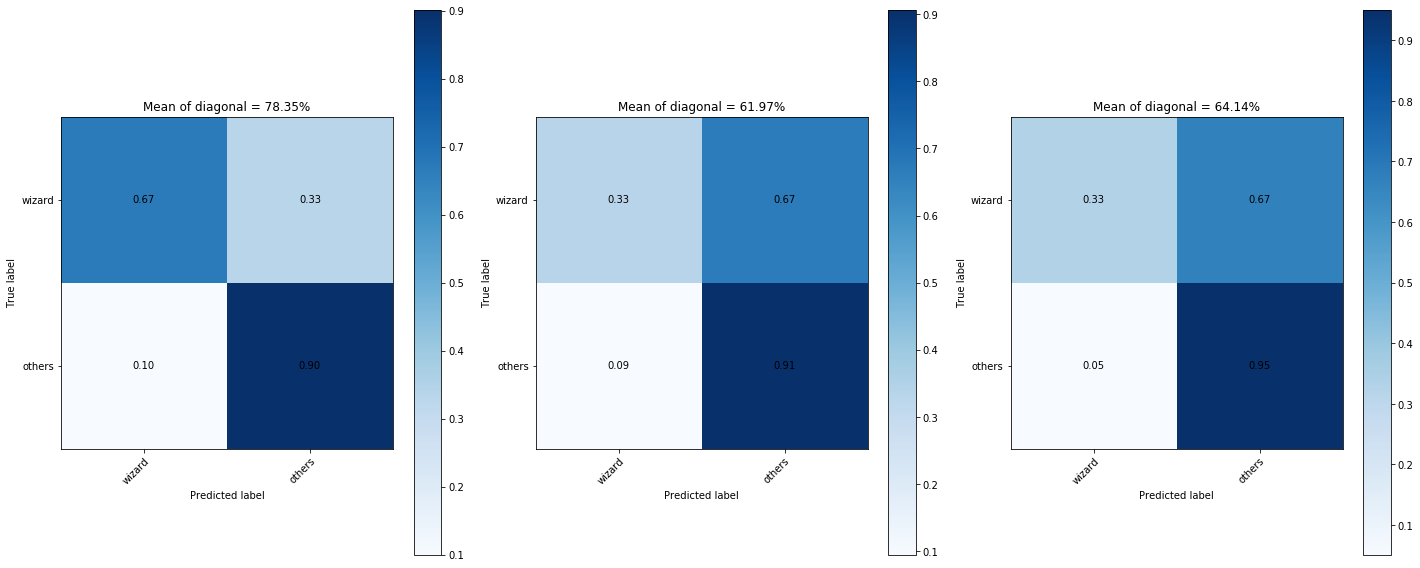

In [18]:
categories_wizard = ["wizard", "others"]
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,8))
svm_wizard4 = show_svm_res('vocab_wizard_600', 200, training_set_wizard, train_labels_wizard, val_labels_wizard, categories_wizard, ax1)
svm_wizard5 = show_svm_res('vocab_wizard_600', 500, training_set_wizard, train_labels_wizard, val_labels_wizard, categories_wizard, ax2)
svm_wizard6 = show_svm_res('vocab_wizard_600', 1000, training_set_wizard, train_labels_wizard, val_labels_wizard, categories_wizard, ax3)
fig.tight_layout()

[INFO] training classifier...
[INFO] evaluating...
Average Accuracy: 80.11%


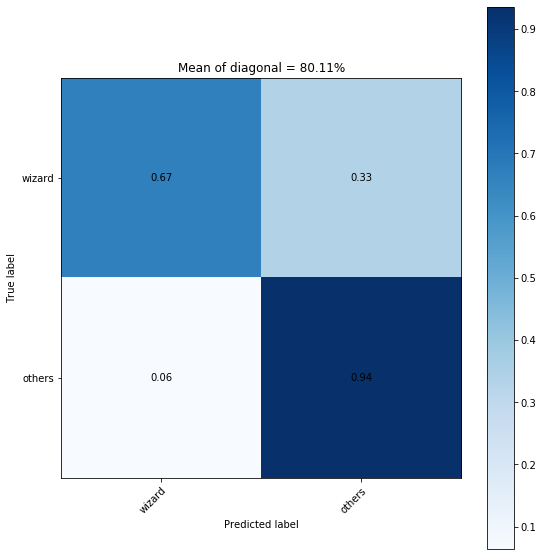

In [22]:
hog_wizard = train_hog(training_set_wizard, train_labels_wizard)
fig, (ax) = plt.subplots(1, 1, figsize=(8,8))
val_labels_hog_wizard = ['others'] * len(val_images_waldo)
val_labels_hog_wizard.extend(['others'] * len(val_images_wenda))
val_labels_hog_wizard.extend(['wizard'] * len(val_images_wizard))
val_labels_hog_wizard.extend(['others'] * len(val_images_others))
show_hog_res(val_images_all, val_labels_hog_wizard, hog_wizard, ax, categories=["wizard", "others"])
fig.tight_layout()

In [23]:
save(hog_wizard, "hog_wizard_body2")

hog_wizard_body2 saved


**FP is too high**, considering there are much more 'others' validation data inside.

### Hog

## Hog with 50:45:44:46

In [33]:
training_set_hog = []
training_set_hog.extend(train_images_waldo)
training_set_hog.extend(train_images_wenda)
training_set_hog.extend(train_images_wizard)
training_set_hog.extend(train_images_others[:50])

train_labels_hog = ['waldo'] * len(train_images_waldo)
train_labels_hog.extend(['wenda'] * len(train_images_wenda))
train_labels_hog.extend(['wizard'] * len(train_images_wizard))
train_labels_hog.extend(['others'] * 50)

In [57]:
hog_balanced_4 = train_hog(training_set_hog, train_labels_hog)

[INFO] training classifier...
[INFO] evaluating...


Average Accuracy: 83.59%


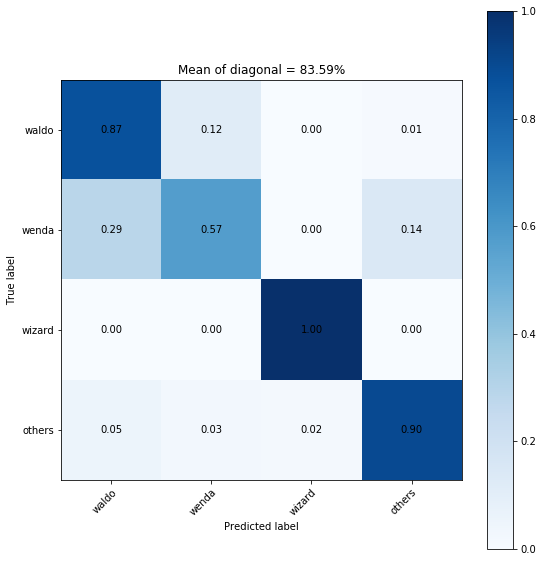

In [58]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,8))
show_hog_res(val_labels, hog_balanced_4, ax)
fig.tight_layout()

In [59]:
save(hog_balanced_4, "hog_balanced_4")

hog_balanced_4 saved


## Hog 600:45:44:46

Average Accuracy: 84.72%


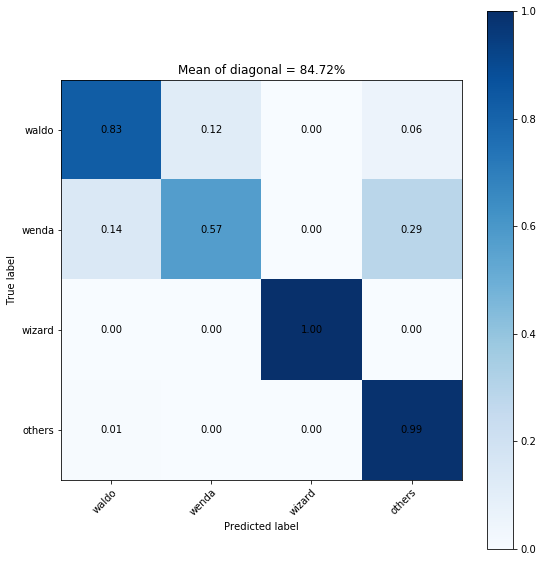

In [61]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,8))
show_hog_res(val_labels, model, ax)
fig.tight_layout()

In [60]:
save(model, "hog_imbalanced_4")

hog_imbalanced_4 saved


## Hog 150:150

In [41]:
training_set_hog2 = []
training_set_hog2.extend(train_images_waldo)
training_set_hog2.extend(train_images_wenda)
training_set_hog2.extend(train_images_wizard)
training_set_hog2.extend(train_images_others[:150])

train_labels_hog2 = ['known'] * (len(train_images_waldo) + len(train_images_wenda) + len(train_images_wizard))
train_labels_hog2.extend(['others'] * 150)

val_labels_hog2 = ['known'] * (len(val_images_waldo) + len(val_images_wenda) + len(val_images_wizard))
val_labels_hog2.extend(['others'] * len(val_images_others))

In [39]:
hog_balanced = train_hog(training_set_hog2, train_labels_hog2)

[INFO] training classifier...
[INFO] evaluating...


Average Accuracy: 95.49%


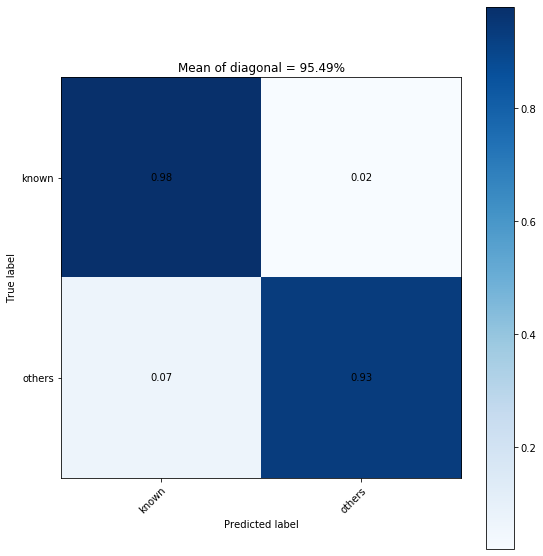

In [42]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,8))
show_hog_res(val_labels_hog2, hog_balanced, ax, ["known", "others"])
fig.tight_layout()

In [56]:
save(hog_balanced,'hog_balanced')

hog_balanced saved


## Hog 600:150

In [43]:
training_set_hog3 = training_set

train_labels_hog3 = ['known'] * (len(train_images_waldo) + len(train_images_wenda) + len(train_images_wizard))
train_labels_hog3.extend(['others'] * len(train_images_others))

val_labels_hog3 = ['known'] * (len(val_images_waldo) + len(val_images_wenda) + len(val_images_wizard))
val_labels_hog3.extend(['others'] * len(val_images_others))

In [44]:
hog_imbalanced = train_hog(training_set_hog3, train_labels_hog3)

[INFO] training classifier...
[INFO] evaluating...


Average Accuracy: 97.31%


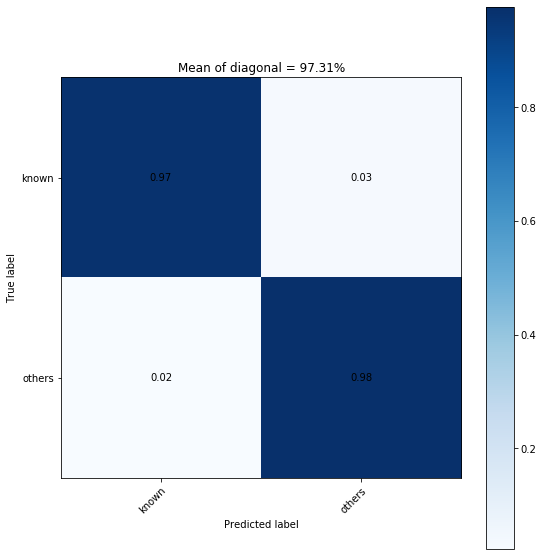

In [45]:
fig, (ax) = plt.subplots(1, 1, figsize=(8,8))
show_hog_res(val_labels_hog3, hog_imbalanced, ax, ["known", "others"])
fig.tight_layout()

In [48]:
save(hog_imbalanced, "hog_imbalanced")

hog_imbalanced saved


### Filter

In [ ]:
from matplotlib.patches import Rectangle
import matplotlib.image as mpimg

def plot(image_id, bboxes):
    fig, ax = plt.subplots(figsize=(20,16))
    ax.axis('off')
    img = mpimg.imread('datasets/JPEGImages/{}.jpg'.format(image_id))
    im = ax.imshow(img)

    for box in bboxes:
        y_min, y_max, x_min, x_max = box
        bbox = ax.add_patch(Rectangle((x_min,y_min),x_max-x_min,y_max-y_min, linewidth=1,
                                  edgecolor='r', facecolor='none'))